# Non-Personalized Recommendations


The basic type of recommendations is called non-personalized recommendations. They are called this as they are made to all users, without taking their preferences into account.

We have 3 types of non-personalized recommendations

<ol>
    <li>The most popular items.
    <li>The most liked items.
    <li>The most commonly seen together. 

In [35]:
import pandas as pd 
import numpy as np 
from itertools import permutations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [66]:
user_ratings = pd.read_csv('user_ratings.csv')
user_ratings_df = user_ratings.iloc[:100000,:]
user_ratings_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


## Finding the most frequent movies

In [19]:
#the counts of occurrences of each movie title
movie_popularity = user_ratings_df['title'].value_counts()
movie_popularity.head()

Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: title, dtype: int64

<li>
 Forrest Gump has been watched by 329 viewers in the dataset,and is the most viewed movie by far.
<li>
 Just because a movie has been watched by a lot of people doesn't necessarily mean viewers enjoyed it. To understand how a viewer actually felt about a movie, we will use ratings from each of the viewers in dataset.


## Finding the average rating of each movie

In [20]:
# mean of the ratings given to each title
average_rating_df = user_ratings_df[["title", "rating"]].groupby('title').mean()
average_rating_df.head()

,rating
title,
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0
'Tis the Season for Love (2015),1.5


In [21]:
# order the entries by highest average rating to lowest
sorted_average_ratings = average_rating_df.sort_values(by='rating', ascending=False)
sorted_average_ratings.head()

,rating
title,
The Adventures of Sherlock Holmes and Doctor Watson,5.0
Into the Forest of Fireflies' Light (2011),5.0
"Human Condition III, The (Ningen no joken III) (1961)",5.0
Rivers and Tides (2001),5.0
Kung Fu Panda: Secrets of the Masters (2011),5.0


<ul>
    <li>
 Despite this being a real-world dataset, we might be surprised that the highest-ranked movies are not movies that  most people have heard of.
    This is because very infrequently-viewed movies are skewing the results. 
<li>
 Above,we have used the two most common non-personalized recommendation methods to find movies to suggest. they both have their weaknesses.
<li>
    Finding the most frequently watched movies will show you what has been watched, but not how people explicitly feel about it. However, finding the average of reviews has the opposite problem where we have customers' explicit feedback, but individual preferences are skewing the data.

## Combining popularity and reviews

In [22]:
# popular movies which appeared > 50 times in dataset
popular_movies = movie_popularity[movie_popularity > 50].index
popular_movies

Index(['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)',
       'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)',
       'Matrix, The (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Jurassic Park (1993)', 'Braveheart (1995)',
       'Terminator 2: Judgment Day (1991)', 'Schindler's List (1993)',
       ...
       'Grumpier Old Men (1995)', 'Chasing Amy (1997)',
       'X-Men: The Last Stand (2006)', 'Splash (1984)',
       'Mulholland Drive (2001)', 'The Devil's Advocate (1997)', 'Blow (2001)',
       'Army of Darkness (1993)', 'Bad Boys (1995)', 'Training Day (2001)'],
      dtype='object', length=437)

In [23]:
# filter the original DataFrame by popular_movies
popular_movies_rankings = user_ratings_df[user_ratings_df['title'].isin(popular_movies)]
popular_movies_rankings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [24]:
# average rating given to these frequently watched films
popular_movies_average_rankings = popular_movies_rankings[['title','rating']].groupby('title').mean()
popular_movies_average_rankings.sort_values(by='rating',ascending=False).head()

,rating
title,
"Shawshank Redemption, The (1994)",4.429022
"Godfather, The (1972)",4.289062
Fight Club (1999),4.272936
Cool Hand Luke (1967),4.271930
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),4.268041


## Making intelligent non-personalized recommendations

Here we will work through how to find all pairs of movies or all permutations of pairs of movies that have been watched by the same person.

In [25]:
# Create function to find all permutations
def find_movie_pairs(x):
    #it will find all possible pairs of items
    pairs = pd.DataFrame(list(permutations(x.values,2)),columns=['movie_a','movie_b'])
    return pairs

In [26]:
movie_combinations = user_ratings_df.groupby('userId')['title'].apply(find_movie_pairs).reset_index(drop=True)

In [27]:
movie_combinations.head()

,movie_a,movie_b
0,Toy Story (1995),Grumpier Old Men (1995)
1,Toy Story (1995),Heat (1995)
2,Toy Story (1995),Seven (a.k.a. Se7en) (1995)
3,Toy Story (1995),"Usual Suspects, The (1995)"
4,Toy Story (1995),From Dusk Till Dawn (1996)


We now have a clean table of all of the movies that were watched by the same user, which can be used to find the most commonly paired movies.

In [28]:
combination_counts = movie_combinations.groupby(['movie_a', 'movie_b']).size()
combination_counts.head()

movie_a                                  movie_b                                               
'Hellboy': The Seeds of Creation (2004)  'Round Midnight (1986)                                    1
                                         ...And Justice for All (1979)                             1
                                         101 Dalmatians (One Hundred and One Dalmatians) (1961)    1
                                         12 Angry Men (1957)                                       1
                                         13th Warrior, The (1999)                                  1
dtype: int64

In [29]:
# Convert the results to a DataFrame and reset the index
combination_counts_df = combination_counts.to_frame(name='size').reset_index()
print(combination_counts_df.head())

                                   movie_a  \
0  'Hellboy': The Seeds of Creation (2004)   
1  'Hellboy': The Seeds of Creation (2004)   
2  'Hellboy': The Seeds of Creation (2004)   
3  'Hellboy': The Seeds of Creation (2004)   
4  'Hellboy': The Seeds of Creation (2004)   

                                             movie_b  size  
0                             'Round Midnight (1986)     1  
1                      ...And Justice for All (1979)     1  
2  101 Dalmatians (One Hundred and One Dalmatians...     1  
3                                12 Angry Men (1957)     1  
4                           13th Warrior, The (1999)     1  


In [32]:
# Sort the counts from highest to lowest
combination_counts_df.sort_values('size',ascending=False,inplace=True)

In [45]:
# Find the movies most frequently watched by people who watched Thor
thor_df = combination_counts_df[combination_counts_df['movie_a']=='Thor (2011)']

In [54]:
thor_df.head()

,movie_a,movie_b,size
21303581,Thor (2011),Iron Man (2008),34
21302207,Thor (2011),"Dark Knight, The (2008)",31
21303506,Thor (2011),Inception (2010),30
21301348,Thor (2011),Avatar (2009),30
21306346,Thor (2011),Up (2009),30


Text(0, 0.5, 'Recommendations')

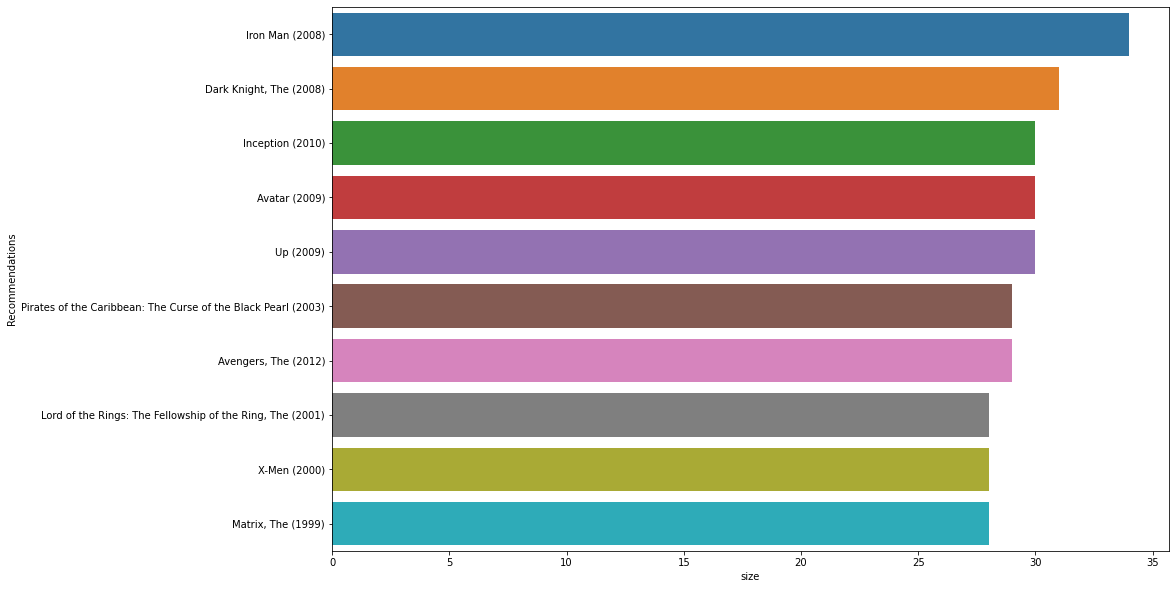

In [65]:
plt.figure(figsize=[15,10])
sns.barplot(data=thor_df.head(10).sort_values('size',ascending=False),y='movie_b',x='size')
#thor_df.head(10).sort_values('size').plot.barh(x="movie_b")
plt.ylabel('Recommendations')

### We can see that Iron Man was the most commonly watched movie by those who watched Thor. This means that it would be a good movie to recommend Thor watchers as it shows they have similar fans.